Data Pre-processing

In [1]:
import pandas as pd
import random 

df = pd.read_csv("cleaned_data.csv")



import pyspark

sc = pyspark.SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

df = sqlContext.read.parquet("s3://dsfinal/cleaned_data.parquet", header=True)

In [ ]:
#Label Encoding
from sklearn import preprocessing  

label_encoder = preprocessing.LabelEncoder()

df['brandName'] = label_encoder.fit_transform(df['brandName'])
df['name'] = label_encoder.fit_transform(df['name'])
df['nickname'] = label_encoder.fit_transform(df['nickname'])
df['designer'] = label_encoder.fit_transform(df['designer'])
df['productType'] = label_encoder.fit_transform(df['productType'])
df['category'] = label_encoder.fit_transform(df['category'])
df['designer'] = label_encoder.fit_transform(df['designer'])
df['singleGender'] = label_encoder.fit_transform(df['singleGender'])
df['color'] = label_encoder.fit_transform(df['color'])
df['midsole'] = label_encoder.fit_transform(df['midsole'])
df['upperMaterial'] = label_encoder.fit_transform(df['upperMaterial'])
df['Size'] = label_encoder.fit_transform(df['Size'])
df['Price_Range'] = label_encoder.fit_transform(df['Price_Range'])

In [ ]:
df

,releaseDate,brandName,name,nickname,designer,productType,category,singleGender,color,midsole,upperMaterial,Size,Price_Range
0,2021,0,6,24,3,0,1,0,7,2,3,0,2
1,2021,0,18,57,4,0,1,0,1,2,11,1,0
2,2021,0,26,77,4,0,1,0,5,2,11,5,0
3,2021,1,37,4,3,0,1,0,0,6,3,0,2
4,2021,2,87,55,2,0,2,0,2,6,11,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2020,3,89,80,5,1,4,2,15,6,11,2,2
139,2020,3,89,80,5,1,4,2,15,6,11,6,0
140,2020,3,89,80,5,1,4,2,15,6,11,8,2
141,2020,3,89,80,5,1,4,2,15,6,11,3,1


In [ ]:
continous_col=['releaseDate',	'brandName',	'name','nickname'	,'designer'	,'productType','category','singleGender',	'color','midsole','upperMaterial'	,'Size','Price_Range']

#Correlation matrix
correlation_df=df[continous_col].corr()
correlation_df

,releaseDate,brandName,name,nickname,designer,productType,category,singleGender,color,midsole,upperMaterial,Size,Price_Range
releaseDate,1.000000,-0.130137,-0.061534,-0.359184,-0.390506,-0.289274,-0.280420,-0.284915,-0.201990,-0.053012,-0.259016,-0.025400,0.049031
brandName,-0.130137,1.000000,0.926592,0.692180,0.619760,0.925539,0.927277,0.895267,0.731932,0.814311,0.664941,0.049482,-0.112485
name,-0.061534,0.926592,1.000000,0.598277,0.490231,0.808776,0.813996,0.826045,0.658924,0.758036,0.564506,0.026663,-0.109182
nickname,-0.359184,0.692180,0.598277,1.000000,0.630014,0.783506,0.761359,0.753869,0.667570,0.515381,0.573731,0.024311,-0.093974
designer,-0.390506,0.619760,0.490231,0.630014,1.000000,0.812342,0.818133,0.783971,0.655837,0.547314,0.743734,0.001136,-0.088750
productType,-0.289274,0.925539,0.808776,0.783506,0.812342,1.000000,0.988898,0.969761,0.819811,0.744787,0.753395,0.010929,-0.107713
category,-0.280420,0.927277,0.813996,0.761359,0.818133,0.988898,1.000000,0.957485,0.800557,0.750097,0.763957,0.015123,-0.108777
singleGender,-0.284915,0.895267,0.826045,0.753869,0.783971,0.969761,0.957485,1.000000,0.816201,0.756513,0.685667,-0.017997,-0.098823
color,-0.201990,0.731932,0.658924,0.667570,0.655837,0.819811,0.800557,0.816201,1.000000,0.543970,0.595909,0.038860,-0.109948
midsole,-0.053012,0.814311,0.758036,0.515381,0.547314,0.744787,0.750097,0.756513,0.543970,1.000000,0.530886,-0.026290,-0.108867


In [ ]:
#Finding cols where absolute corr>0.2 with target var
correlation_df['Price_Range'][abs(correlation_df['Price_Range'])>0.04]

releaseDate      0.049031
brandName       -0.112485
name            -0.109182
nickname        -0.093974
designer        -0.088750
productType     -0.107713
category        -0.108777
singleGender    -0.098823
color           -0.109948
midsole         -0.108867
upperMaterial   -0.084841
Size             0.054655
Price_Range      1.000000
Name: Price_Range, dtype: float64

Data Splitting

In [3]:
from sklearn.model_selection import train_test_split

col=['productType','category','color','singleGender','midsole','upperMaterial']
X=df[col]

y=df['Price_Range']  # Labels

#Spliting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) 

ModuleNotFoundError: No module named 'sklearn'

ML Models

DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Reg_model=DecisionTreeRegressor(max_depth=None,criterion='squared_error')

print(Reg_model)

Reg_model.fit(X_train,y_train)
y_pred=Reg_model.predict(X_test)

DecisionTreeRegressor()


In [ ]:
comp = pd.DataFrame({ "actual": y_test, "pred": y_pred })
comp 
#Actual value vs Predicted value

,actual,pred
130,1,1.081633
66,2,2.000000
9,2,2.000000
81,1,1.081633
15,1,2.000000
...,...,...
29,1,0.000000
64,2,1.081633
68,0,2.000000
75,1,1.000000


Linear Regression

R2 value: 0.2854190242761979


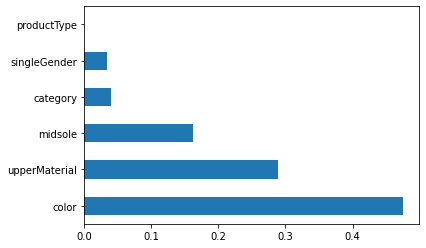

In [ ]:
from sklearn import metrics

print('R2 value:', metrics.r2_score(y_train,Reg_model.predict(X_train)))

%matplotlib inline
feature_importances= pd.Series(Reg_model.feature_importances_,index=col)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
from pydoc import tempfilepager
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()

temp=model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print('R2:', metrics.r2_score(y_train,temp.predict(X_train)))
y_pred

R2: 0.007386687065347841


array([1.08163265, 1.21860961, 1.37549094, 1.08163265, 1.21860961,
       1.08163265, 1.16882182, 1.08163265, 1.08163265, 1.08163265,
       1.08163265, 1.25357374, 1.08163265, 1.08163265, 1.08163265,
       1.08163265, 1.08163265, 0.91915516, 1.08163265, 1.08163265,
       1.08163265, 1.08163265, 1.08163265, 1.08163265, 1.08163265,
       1.1661115 , 1.08163265, 1.08163265, 1.08163265, 1.29812134,
       1.08163265, 1.17383378, 1.08163265, 1.22362158, 1.23436073,
       1.08163265, 1.08163265, 1.08163265, 1.32319716, 1.08163265,
       1.08163265, 1.08163265, 1.08163265, 1.07389435, 1.08163265,
       1.08163265, 1.08163265, 1.23948982, 1.08163265, 1.26067511,
       1.08163265, 1.08163265, 1.08163265, 1.00714678, 1.00762775,
       1.08163265, 1.08163265, 1.08163265, 1.25879347, 1.18719002,
       1.21088732, 1.08163265, 1.08163265, 1.25943655, 1.08163265,
       1.27304552, 1.08163265, 1.13562995, 1.16499005, 1.12404599])

In [ ]:
comp = pd.DataFrame({ "actual": y_test, "pred": y_pred })
comp 
#Actual value vs Predicted value

,actual,pred
130,1,1.081633
66,2,1.218610
9,2,1.375491
81,1,1.081633
15,1,1.218610
...,...,...
29,1,1.273046
64,2,1.081633
68,0,1.135630
75,1,1.164990
